
### Question 2
- For the network listed above, use Numpy to generate the output (one forward pass, one backpropagation, and one forward pass for a single input)
- Repeat with Keras 
- Next, try this for 100 epochs (rounds on the data), plotting the loss for each Epoch), using Numpy & Keras seperatly.

#### Using numpy single time

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Using numpy
x = np.array(([0.5726, 0.5833]), dtype=float)
y = np.array(([0.75]), dtype = float)

# Class function
class ANN(object):

  # constructor
  def __init__(self, lrIn = 0.5):
    self.W1 = np.array(([-3.6, 1.5, 0.99], [-1.23, -3.6, 1.4]), dtype = float)
    self.W2 = np.array(([0.11],[2.22],[1.4]), dtype = float)
    self.learningRate = lrIn

  #sigmoid function
  def sigmoid(self, valuesIN):
    return 1/(1+np.exp(-valuesIN))

  # forward steps
  def forward(self, inputsX):
    self.Zi = np.dot(inputsX, self.W1)     # Step 1
    self.Ai = self.sigmoid(self.Zi)        # Step 2
    self.Z4 = np.dot(self.Ai, self.W2)     # Step 3
    y_Hat = self.sigmoid(self.Z4)          # Step 4
    return y_Hat


  #derivative of sigmoid
  def sigmoidPrime(self, s):
    return s * (1 - s)

  # backpropagation
  def backpropagation(self, X, Y, y_Hat):
    self.o_error = y_Hat - Y

    # Calculate the Delta (y - Y)(y)(1 - y)
    self.o_delta = np.array(([self.o_error*self.sigmoidPrime(y_Hat)]), dtype=float) 
    # Calculate error for A hidden layer (includes delta)
    self.Ai_error = self.o_delta.dot(self.W2.T) 
    #LR * W2n * Delta
    self.W2 -= self.learningRate * np.array(([self.Ai]), dtype=float).T.dot(self.o_delta)  
    # Step Sigmoid        
    self.Ai_delta = self.Ai_error*self.sigmoidPrime(self.Ai)
    #LR * W1n * A delta
    self.W1 -= self.learningRate * np.array(([X]), dtype=float).T.dot(self.Ai_delta) 
    
    
  def train(self, x, Y):
    y_Hat = self.forward(x)
    self.backpropagation(x, Y, y_Hat)  

In [3]:
# Run the first forward step
test = ANN()
y_hat = test.forward(x)

# Print the prediction and loss
print("First Forward Step: ")
print("Predicted Score:",round(y_hat[0] * 100,2),"%")
print("Loss: " + str(np.mean(np.square(y - y_hat))))


# Run the backpropagation
test.train(x, y)
print("\n\nBackpropagation Step Running\n\n")

print("Second Forward Step: ")
# Run the second forward step
y_2 = test.forward(x)
# Print the prediction and loss
print("Predicted Score:",round(y_2[0] * 100,2),"%")
print("Loss: " + str(np.mean(np.square(y - y_2))))

First Forward Step: 
Predicted Score: 83.53 %
Loss: 0.007276299673988045


Backpropagation Step Running


Second Forward Step: 
Predicted Score: 83.46 %
Loss: 0.007162794125314125


#### Using Keras single time

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [5]:
# seed = 1
# # fix random seed for reproducibility
# np.random.seed(seed)
# tf.random.set_seed(seed)

opt = tf.keras.optimizers.SGD(
    learning_rate=0.5,
    momentum=0.0, 
    nesterov=False
)

X_k = np.array(([[0.5726, 0.5833]]), dtype=float)
Y_k = np.array(([0.7500]), dtype = float)

model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([-3.6,1.5,0.99],[-1.23,-3.6,1.4]), dtype=float)]
W2 = [np.array(([0.11],[2.22],[1.4]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

In [6]:
# Print the prediction and loss
print("First Forward Step: ")
result = model.predict(X_k)[0][0]
result1 = model.fit(X_k, Y_k, epochs =1, batch_size = 1, verbose = 0)
print("Predicted Score:",round(result * 100,2),"%")
loss = float(result1.history["loss"][0])*0.5
print("Loss: " + str(loss))

print("Second Forward Step: ")
result3 = model.predict(X_k)[0][0]
result4 = model.fit(X_k, Y_k, epochs =1, batch_size = 1, verbose = 0)
print("Predicted Score:",round(result3 * 100,2),"%")
loss = float(result4.history["loss"][0])
print("Loss: " + str(loss))

First Forward Step: 
1/1 [==============================] - 0s 453ms/step
Predicted Score: 83.53 %
Loss: 0.003638149006292224
Second Forward Step: 
1/1 [==============================] - 0s 74ms/step
Predicted Score: 83.4 %
Loss: 0.007049871608614922


#### Numpy with 100 times


***************************
Epoch 1 
***************************
Predicted Score: 83.53 %
Loss: [0.00363815]

***************************
Epoch 2 
***************************
Predicted Score: 83.46 %
Loss: [0.0035814]

***************************
Epoch 3 
***************************
Predicted Score: 83.4 %
Loss: [0.00352522]

***************************
Epoch 4 
***************************
Predicted Score: 83.33 %
Loss: [0.00346963]

***************************
Epoch 5 
***************************
Predicted Score: 83.26 %
Loss: [0.00341462]

***************************
Epoch 6 
***************************
Predicted Score: 83.2 %
Loss: [0.00336019]

***************************
Epoch 7 
***************************
Predicted Score: 83.13 %
Loss: [0.00330634]

***************************
Epoch 8 
***************************
Predicted Score: 83.07 %
Loss: [0.00325307]

***************************
Epoch 9 
***************************
Predicted Score: 83.0 %
Loss: [0.00320039]

*************

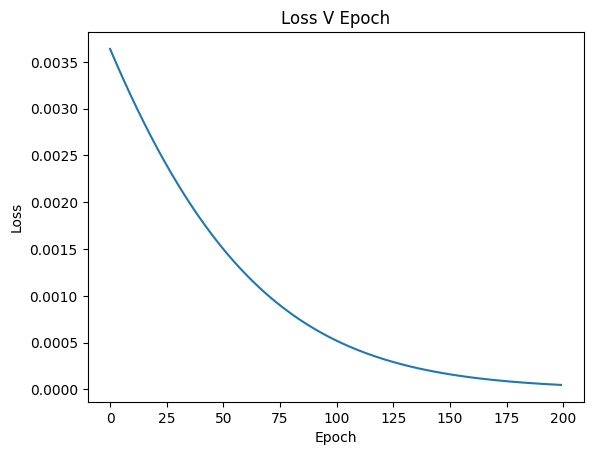

In [7]:
# Using the numpy with 100 epochs
epochs = 200
lossPerEpoch = []
test = ANN()

for i in range(epochs): 
  print("\n***************************\nEpoch", (i+1),"\n***************************") 
  y_hat = test.forward(x)

  # Print the prediction and loss
  print("Predicted Score:",round(y_hat[0] * 100,2),"%")
  loss = 0.5*(np.square(y - y_hat))
  print("Loss: " + str(loss))
  test.train(x, y)
  lossPerEpoch.append(loss)

plt.plot(lossPerEpoch)
plt.title("Loss V Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#### Using Keras 100 times


***************************
Epoch 1 
***************************
1/1 [==============================] - 0s 75ms/step
Predicted Score:	 0.8326323
Loss: 			 0.0034140488132834435

***************************
Epoch 2 
***************************
1/1 [==============================] - 0s 40ms/step
Predicted Score:	 0.83130795
Loss: 			 0.0033054910600185394

***************************
Epoch 3 
***************************
1/1 [==============================] - 0s 56ms/step
Predicted Score:	 0.829991
Loss: 			 0.003199278609827161

***************************
Epoch 4 
***************************
1/1 [==============================] - 0s 54ms/step
Predicted Score:	 0.82868177
Loss: 			 0.0030954102985560894

***************************
Epoch 5 
***************************
1/1 [==============================] - 0s 59ms/step
Predicted Score:	 0.82738066
Loss: 			 0.0029938830994069576

***************************
Epoch 6 
***************************
1/1 [==============================] - 0s 1

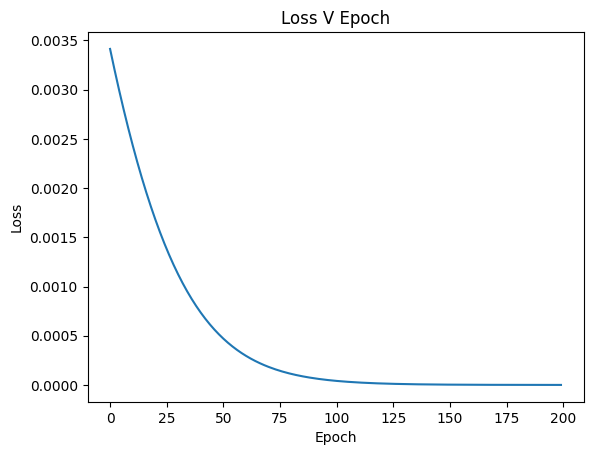

In [8]:
lossPerEpoch = []
epochs = 200

for i in range(epochs):
    print("\n***************************\nEpoch", (i+1),"\n***************************")
    result = model.predict(X_k)[0][0]
    print("Predicted Score:\t", result)
    result1 = model.fit(X_k,Y_k, epochs =1, batch_size = 1, verbose = 0)
    loss = float(result1.history["loss"][0])*0.5
    print("Loss: \t\t\t", loss)
    lossPerEpoch.append(loss)

plt.plot(lossPerEpoch)
plt.title("Loss V Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Question 3

#### Relu


[Text(0.5, 1.0, 'Loss V Epoch with Relu'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Loss')]

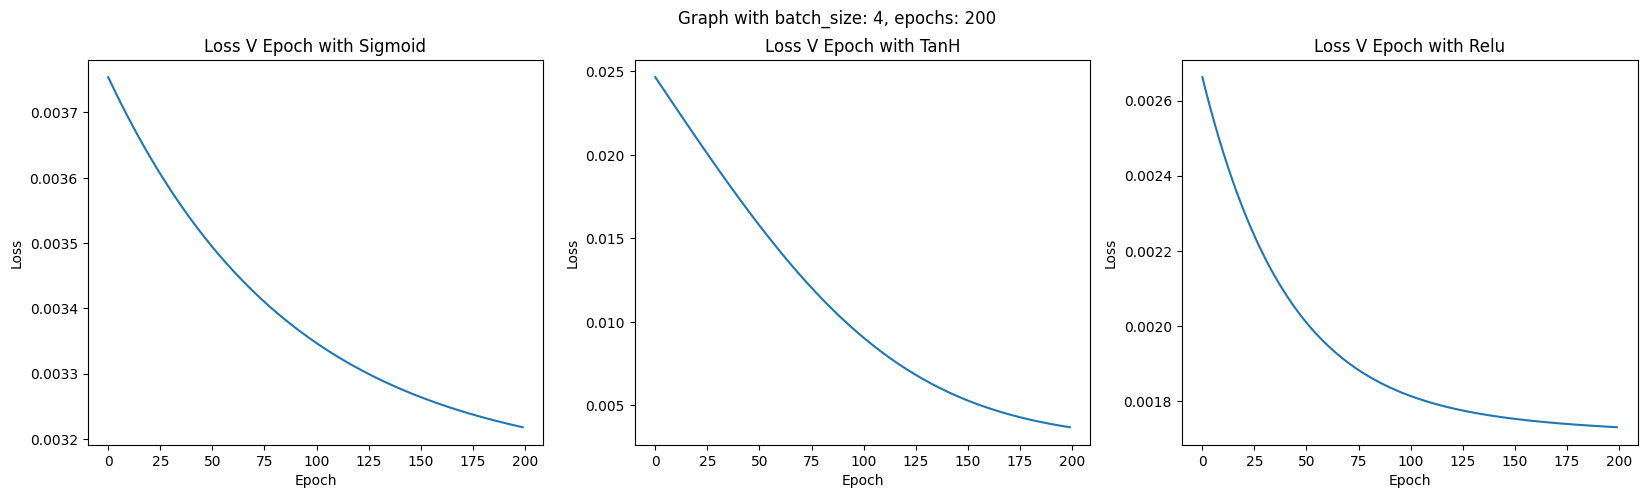

In [18]:
seed = 1
# fix random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)

opt = tf.keras.optimizers.legacy.SGD(
    learning_rate=0.1,
    momentum=0.0, 
    nesterov=False
)

X_3 = np.array(([[0.5726, 0.5833],
                [0.4032, 0.4583],
                [0.6774, 0.6250],
                [0.6129, 0.5000]]), dtype=float)
Y_3 = np.array(([0.7500],
                [0.6200],
                [0.8000],
                [0.7800]), dtype = float)


fig, d = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle("Graph with batch_size= 4, epochs= 200")

model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_sig = model.fit(X_3, Y_3, epochs =200, batch_size = 4, verbose = 0)

d[0].plot(result_sig.history["loss"])
d[0].set(title = "Loss V Epoch with Sigmoid", xlabel='Epoch', ylabel='Loss')




model = Sequential()
model.add(Dense(3, input_dim=2, activation='tanh', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_tanh = model.fit(X_3, Y_3, epochs =200, batch_size = 4, verbose = 0)

d[1].plot(result_tanh.history["loss"])
d[1].set(title = "Loss V Epoch with TanH", xlabel='Epoch', ylabel='Loss')




model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_relu = model.fit(X_3, Y_3, epochs =200, batch_size = 4, verbose = 0)

d[2].plot(result_relu.history["loss"])
d[2].set(title = "Loss V Epoch with Relu", xlabel='Epoch', ylabel='Loss')


[Text(0.5, 1.0, 'Loss V Epoch with Relu'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Loss')]

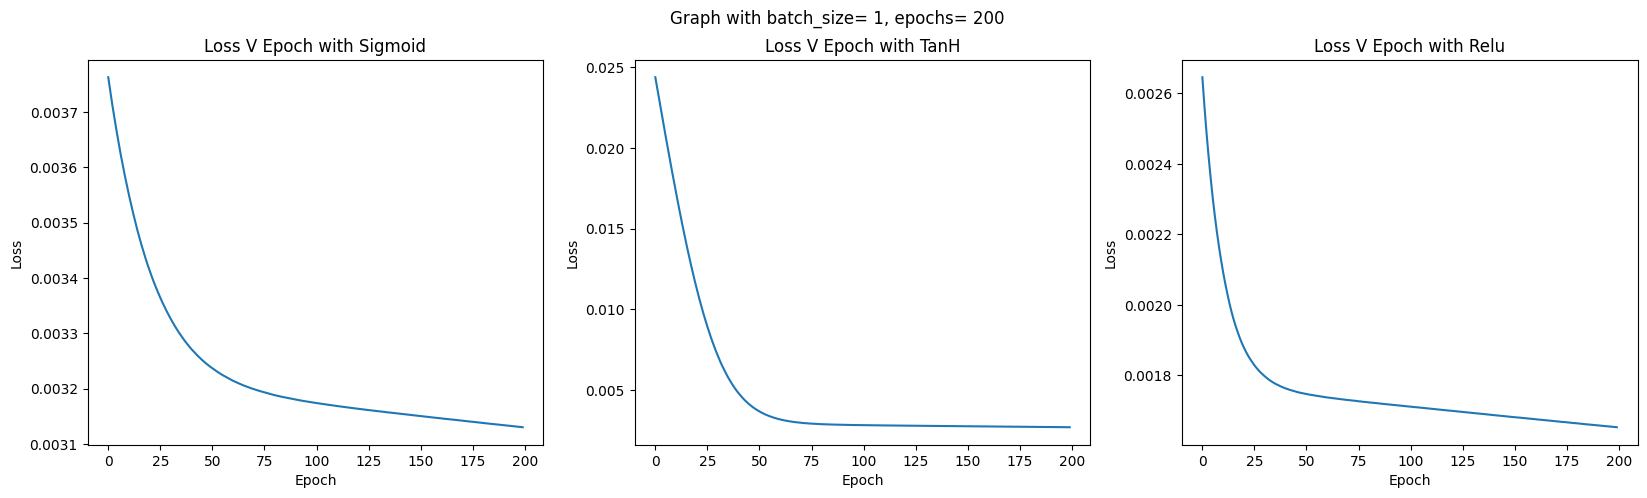

In [19]:
fig, d = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle("Graph with batch_size= 1, epochs= 200")

# with Sigmoid
model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_sig = model.fit(X_3, Y_3, epochs =200, batch_size = 1, verbose = 0)

d[0].plot(result_sig.history["loss"])
d[0].set(title = "Loss V Epoch with Sigmoid", xlabel='Epoch', ylabel='Loss')


# with TanH
model = Sequential()
model.add(Dense(3, input_dim=2, activation='tanh', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_tanh = model.fit(X_3, Y_3, epochs =200, batch_size = 1, verbose = 0)

d[1].plot(result_tanh.history["loss"])
d[1].set(title = "Loss V Epoch with TanH", xlabel='Epoch', ylabel='Loss')


# with Relu
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_relu = model.fit(X_3, Y_3, epochs =200, batch_size = 1, verbose = 0)

d[2].plot(result_relu.history["loss"])
d[2].set(title = "Loss V Epoch with Relu", xlabel='Epoch', ylabel='Loss')


[Text(0.5, 1.0, 'Loss V Epoch with Relu'),
 Text(0.5, 0, 'Epoch'),
 Text(0, 0.5, 'Loss')]

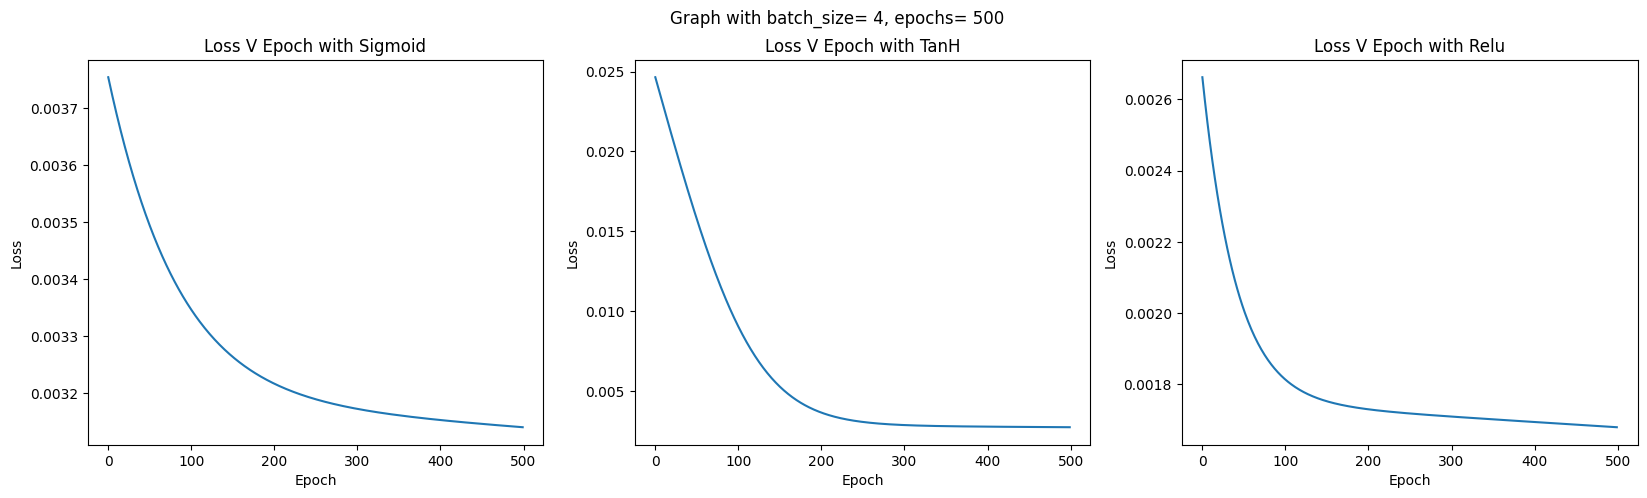

In [20]:
fig, d = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle("Graph with batch_size= 4, epochs= 500")

# with Sigmoid
model = Sequential()
model.add(Dense(3, input_dim=2, activation='sigmoid', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_sig = model.fit(X_3, Y_3, epochs =500, batch_size = 4, verbose = 0)

d[0].plot(result_sig.history["loss"])
d[0].set(title = "Loss V Epoch with Sigmoid", xlabel='Epoch', ylabel='Loss')


# with TanH
model = Sequential()
model.add(Dense(3, input_dim=2, activation='tanh', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_tanh = model.fit(X_3, Y_3, epochs =500, batch_size = 4, verbose = 0)

d[1].plot(result_tanh.history["loss"])
d[1].set(title = "Loss V Epoch with TanH", xlabel='Epoch', ylabel='Loss')


# with Relu
model = Sequential()
model.add(Dense(3, input_dim=2, activation='relu', use_bias = False))
model.add(Dense(1, activation='sigmoid', use_bias = False))
model.compile(loss='mse', optimizer=opt, metrics=['acc'])

W1 = [np.array(([1.23,0.34,-3.71],[-0.58,1.07,-0.65]), dtype=float)]
W2 = [np.array(([0.66],[1.25],[-1.02]), dtype=float)]

# Assigning weights
model.layers[0].set_weights(W1)
model.layers[1].set_weights(W2)

result_relu = model.fit(X_3, Y_3, epochs = 500, batch_size = 4, verbose = 0)

d[2].plot(result_relu.history["loss"])
d[2].set(title = "Loss V Epoch with Relu", xlabel='Epoch', ylabel='Loss')